In [1]:
import jax.numpy as np
import jax
jax.config.update("jax_enable_x64", True)

In [2]:
n = 2

In [3]:
def f(x):
    return (x**2).sum() + np.exp(x).sum()

In [12]:
x = np.array([1.0,2.0])

Array(15.10733793, dtype=float64)

In [6]:
def grad_f(x):
    return 2*x+np.exp(x)

In [7]:
grad_f(x)

Array([ 4.71828183, 11.3890561 ], dtype=float64)

In [14]:
# from jax import grad

# autograd_f = grad(f)

# autograd_f(x)

In [ ]:
# fixed step size gradient descent

In [23]:
eps = 1

trace_x = []

x = np.linspace(1,n,num=n)
nabla =  grad_f(x)
while np.linalg.norm(nabla)>1E-3:
    trace_x.append(x)
    x = x - eps*nabla
    nabla =  grad_f(x)


In [16]:
import pylab as plt

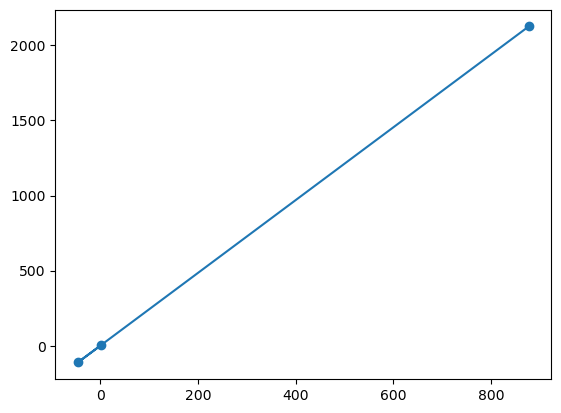

In [24]:
trace_x = np.vstack(trace_x)
plt.scatter(trace_x[:,0],trace_x[:,1])
plt.plot(trace_x[:,0],trace_x[:,1])

In [ ]:
# exact line search

In [26]:
from jax.scipy.optimize import minimize

In [27]:
def g(s):
    return f(x - s*nabla)

In [28]:
eps = 1E-2

trace_x = []

x = np.linspace(1,n,num=n)
nabla =  grad_f(x)
while np.linalg.norm(nabla)>1E-3:
    trace_x.append(x)
    nabla =  grad_f(x)
    eps = minimize(g, np.array([0.0]), method="BFGS")[0]
    x = x - eps*nabla


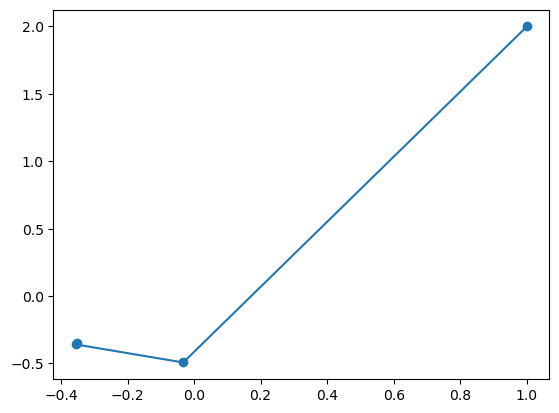

In [29]:
trace_x = np.vstack(trace_x)
plt.scatter(trace_x[:,0],trace_x[:,1])
plt.plot(trace_x[:,0],trace_x[:,1])

In [ ]:
# backtracking line search

In [30]:
alpha = 0.3
beta = 0.5


trace_x = []


x = np.linspace(1,n,num=n)
nabla =  grad_f(x)
while np.linalg.norm(nabla)>1E-3:
    trace_x.append(x)
    nabla =  grad_f(x)
    eps = 1
    while (g(eps)> f(x) + alpha * eps* (nabla* (-nabla)).sum()):
        eps *= beta
    x = x - eps*nabla


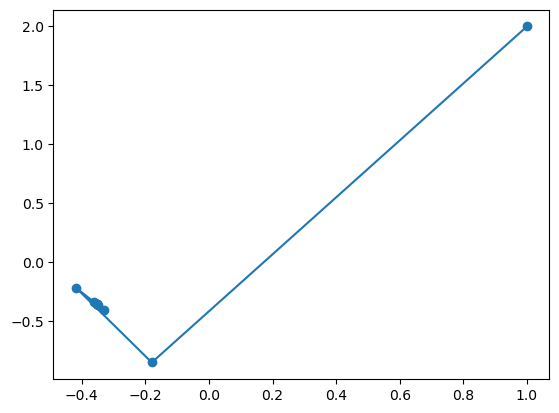

In [31]:
trace_x = np.vstack(trace_x)
plt.scatter(trace_x[:,0],trace_x[:,1])
plt.plot(trace_x[:,0],trace_x[:,1])